# Wholesale Customer Segmentation

Data I am going to use refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories. The aim of the project is to divide customers into groups with similar purchasing preferences. In order to do that I am going to use clustering algorithms. I decided to drop from data any information apart from purchasing preferences features. 

Source: UCI Machine Learning Repository

Attribute Information:
1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.) on grocery products (Continuous);

4) FROZEN: annual spending (m.u.) on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);

7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)

8) REGION: customers Region - Lisbon, Oporto or Other (Nominal)

# Import libraries

In [1]:
# Data processing
import pandas as pd

# Linear algebra
import numpy as np

# Statistics
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

# Scores
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Data exploration and preprocessing

In [2]:
# Loading data

data = pd.read_csv('Wholesale customers.csv')

In [3]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
# Dropping unnecessary columns

to_drop = ['Region', 'Channel']
data.drop(to_drop, axis=1, inplace=True)

In [5]:
# Changing small mistake in column names

data = data.rename(columns={'Delicassen':'Delicatessen'})

In [6]:
# Dropping duplicates

data.drop_duplicates()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


I will make stats function to get some basic knowledge about data.

In [7]:
def stats(df):
    '''Function displays shape, basic description, types of data and quantity of NaN's.
    '''
    print('Data shape:\n', data.shape)
    print(60*'-')
    print()
    print('Data description:\n \n', data.describe())
    print(60*'-')
    print()
    print('Types of data:\n \n', data.dtypes)
    print(60*'-')
    print()
    print("Quantity of NaN's:\n \n", data.isnull().sum())
    print(60*'-')
    
stats(data)

Data shape:
 (440, 6)
------------------------------------------------------------

Data description:
 
                Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000

I will create function to display chart of all features.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


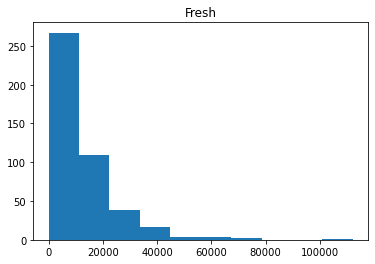

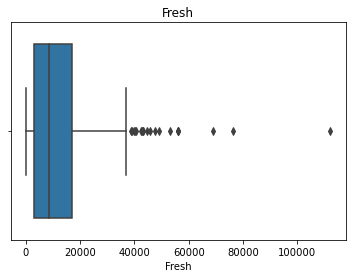

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


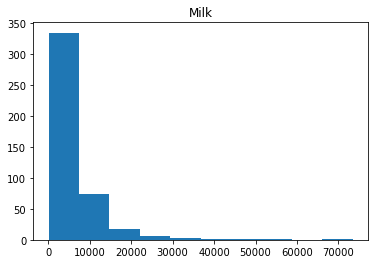

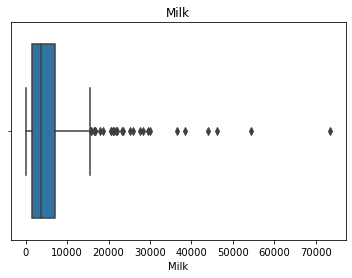

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


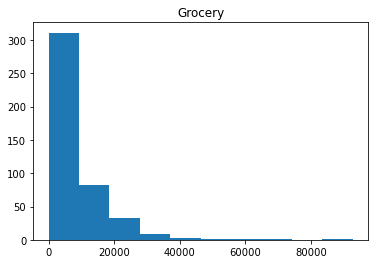

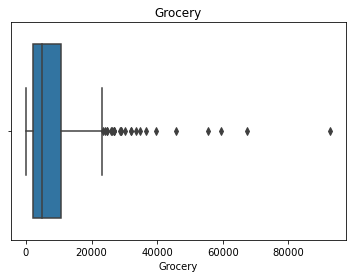

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


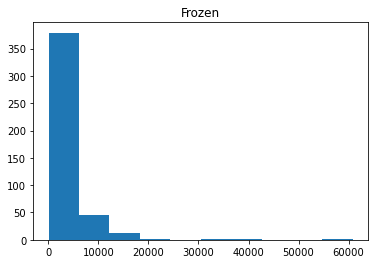

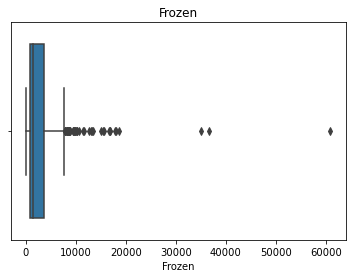

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


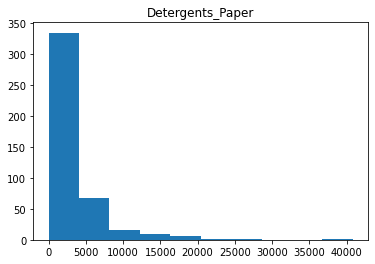

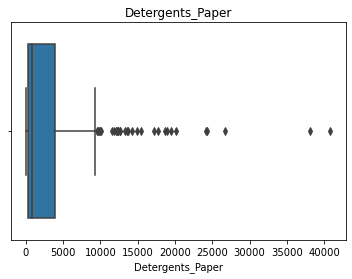

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


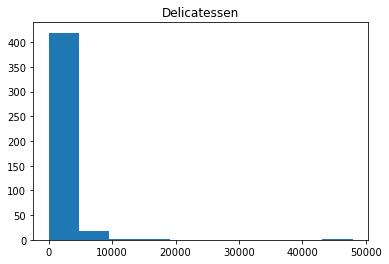

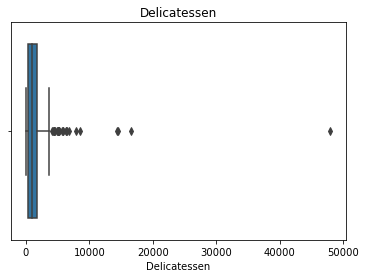

In [8]:
def features(df):
    '''This function iterate all the columns and display histogram and boxplot of every feature in dataset.
    '''
    for i in data.columns:         
        print('--'*120)     
        plt.hist(data[i])
        plt.title(str(i))
        plt.show()
        sns.boxplot(data[i])
        plt.title(str(i))
        plt.show()

features(data)

We can observe a lot of outliers and big skew. I am going to count basics statistics of features like skew, kurtosis, mean and median.

In [9]:
columns = data.keys()

In [10]:
def distributions(df):
    '''Function checks skew, kurtosis, median and mean.
    '''
    for i in columns:
        print(i)
        print('Skewness is: \n',data[i].skew())
        print()
        print('Kurtosis is: \n',data[i].kurtosis())
        print()
        print('Mean is: \n',data[i].mean())
        print()
        print('Median is: \n',data[i].median())
        print()
        
distributions(data)

Fresh
Skewness is: 
 2.561322751927935

Kurtosis is: 
 11.536408493056006

Mean is: 
 12000.297727272728

Median is: 
 8504.0

Milk
Skewness is: 
 4.053754849210881

Kurtosis is: 
 24.669397750673077

Mean is: 
 5796.265909090909

Median is: 
 3627.0

Grocery
Skewness is: 
 3.5874286903915453

Kurtosis is: 
 20.914670390919653

Mean is: 
 7951.277272727273

Median is: 
 4755.5

Frozen
Skewness is: 
 5.9079856924559575

Kurtosis is: 
 54.68928069737255

Mean is: 
 3071.931818181818

Median is: 
 1526.0

Detergents_Paper
Skewness is: 
 3.6318506306913645

Kurtosis is: 
 19.009464335418212

Mean is: 
 2881.4931818181817

Median is: 
 816.5

Delicatessen
Skewness is: 
 11.151586478906117

Kurtosis is: 
 170.69493933454066

Mean is: 
 1524.8704545454545

Median is: 
 965.5



As we can observe distributions of features are characterized by big skewness.

Checking relationships between variables using correlation heatmap:

In [11]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


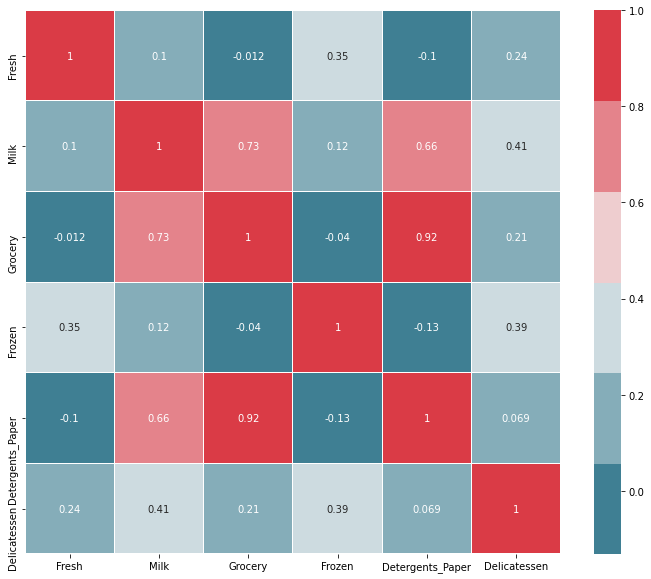

In [12]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220,10), ax=ax, annot=True, linewidths=0.1,
                                                   vmax=1.0, linecolor='white')
plt.show()

The biggest correlation is between Milk, Grocery and Detergents Paper. In order simplify dataset I will drop "Grocery" and "Detergents_Paper"

In [13]:
to_drop = ['Grocery','Detergents_Paper']
data = data.drop(to_drop, axis=1)

In [14]:
data.head()

,Fresh,Milk,Frozen,Delicatessen
0,12669,9656,214,1338
1,7057,9810,1762,1776
2,6353,8808,2405,7844
3,13265,1196,6404,1788
4,22615,5410,3915,5185


In [15]:
# Making copy of original data for visualization purposes

original_data = data.copy()

To deal with a problem with skew I will logarithm data.

In [16]:
log_data = np.log(data)
log_data.head()

,Fresh,Milk,Frozen,Delicatessen
0,9.446913,9.175335,5.365976,7.198931
1,8.861775,9.191158,7.474205,7.482119
2,8.756682,9.083416,7.785305,8.967504
3,9.492884,7.086738,8.764678,7.488853
4,10.026369,8.596004,8.272571,8.553525


Next step is to detect and remove outliers.

In [17]:
def outliers(data):
    '''This function was created in order to remove outliers 
    and use interquartile range (IQR.
    '''
    for i in list(data):
        IQR = np.percentile(data[i],75) - np.percentile(data[i],25)
        Outlier_top = np.percentile(data[i],75) + 1.5*IQR
        Outlier_bottom = np.percentile(data[i],25) - 1.5*IQR
        log_data[i] = np.where(data[i] > Outlier_top,Outlier_top,data[i])
        log_data[i] = np.where(data[i] < Outlier_bottom,Outlier_bottom,data[i])

outliers(log_data)

In [18]:
log_data.head()

,Fresh,Milk,Frozen,Delicatessen
0,9.446913,9.175335,5.365976,7.198931
1,8.861775,9.191158,7.474205,7.482119
2,8.756682,9.083416,7.785305,8.967504
3,9.492884,7.086738,8.764678,7.488853
4,10.026369,8.596004,8.272571,8.553525


Check once again features to be sure we don't have outliers anymore.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


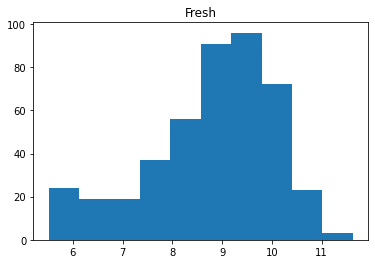

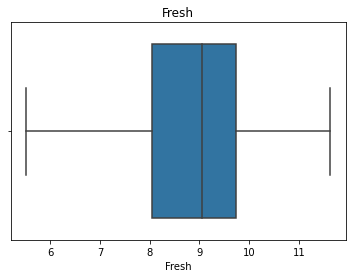

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


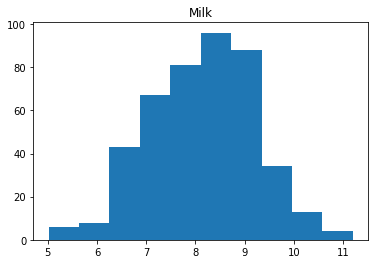

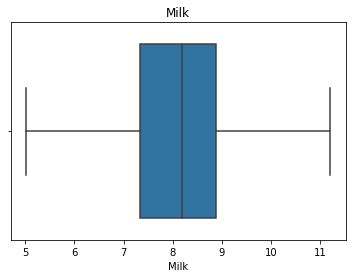

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


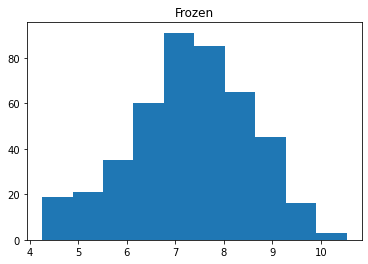

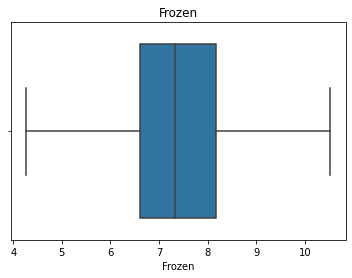

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


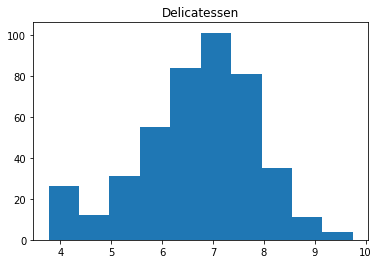

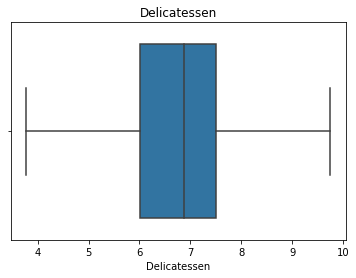

In [19]:
def features(df):
    '''This function iterate all the columns and display histogram and boxplot of every feature in dataset.
    '''
    for i in log_data.columns:
        print('--'*120)     
        plt.hist(log_data[i])
        plt.title(str(i))
        plt.show()
        sns.boxplot(log_data[i])
        plt.title(str(i))
        plt.show()
        
features(log_data)

One more look at relations between features using pairplot function.

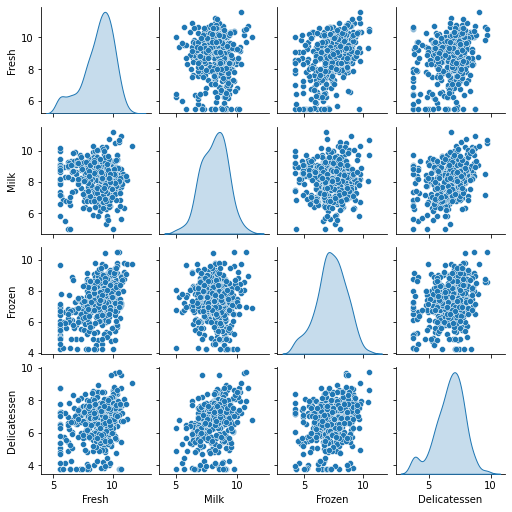

In [20]:
sns.pairplot(log_data, diag_kind='kde',height=1.8)
plt.show()

# Feature engineering

I will standarize data in order to prepare for clustering algorithms.

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_data)

In [22]:
# Making data frame from scaled data to check how do they look like after standarization

scaled_data = pd.DataFrame(scaled_data, columns = log_data.columns)
scaled_data.head()

,Fresh,Milk,Frozen,Delicatessen
0,0.511439,0.982721,-1.552986,0.423084
1,0.059604,0.997515,0.130574,0.665937
2,-0.021547,0.896779,0.379009,1.939758
3,0.546937,-0.970078,1.161103,0.671712
4,0.958885,0.441058,0.768122,1.584742


# Building algorithms and model evaluation

First I am going to use k-means algorithm. It needs to asses optimal number of centroids using elbow methods.

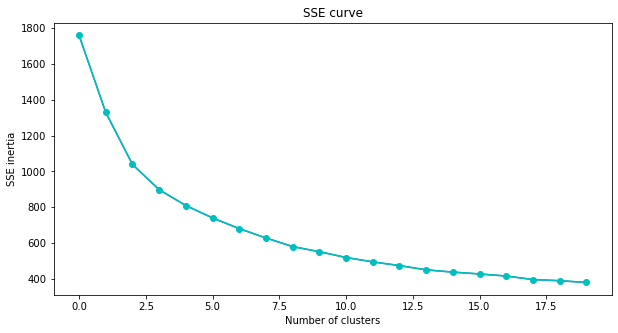

In [23]:
def elbow(data):
    '''Function uses loop and iterates k-means algo searching for optimal number of clusters
        and displays on chart relation between number of clusters and sum squared error
    '''
    SSE = []
    for i in range(1,21):
        km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=0)
        y_km = km.fit_predict(scaled_data)
        SSE.append(km.inertia_)
    plt.figure(figsize=(10,5))
    plt.title('SSE curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE inertia')
    plt.plot(SSE)
    plt.plot(SSE, marker='o', color='c')
    plt.show()
    
elbow(scaled_data)

The greatest increase of SSE is in 6 cluster. This is an optimal quantity of clusters. I will use KMeans algorithm once again using 6 clusters. To evaluate algorithm I will use silhouette score. This metric ranges from -1 to 1. 1 means that clusres are well apart from each orher.

In [24]:
def prop_km(data):
    '''Function perform k-means algo and print silhouette score
    '''
    km = KMeans(n_clusters=6, init='random', random_state=0)
    y_km = km.fit(scaled_data)
    print(silhouette_score(scaled_data, km.labels_))

prop_km(scaled_data)

0.22587635120640828


I will use K-means algorithm once again but this time I will use KMeans++ instead of random location of clusters.

In [25]:
def km(data):
    '''Function perform k-means algo, print silhouette score and creating new column
        in original dataset which is created by k-means prediction
    '''
    km = KMeans(n_clusters=6, init='k-means++', random_state=0)
    y_km = km.fit(scaled_data)
    original_data['Clusters'] = km.predict(scaled_data)
    print(silhouette_score(scaled_data, km.labels_))
    
km(scaled_data)

0.2287507009884967


In [26]:
original_data.head(10)

,Fresh,Milk,Frozen,Delicatessen,Clusters
0,12669,9656,214,1338,0
1,7057,9810,1762,1776,0
2,6353,8808,2405,7844,0
3,13265,1196,6404,1788,4
4,22615,5410,3915,5185,4
5,9413,8259,666,1451,0
6,12126,3199,480,545,3
7,7579,4956,1669,2566,0
8,5963,3648,425,750,5
9,6006,11093,1159,2098,0


In [27]:
# Grouping data in terms of clusters and counting mean

clusters = original_data.groupby(['Clusters']).mean()
clusters

,Fresh,Milk,Frozen,Delicatessen
Clusters,,,,
0,11910.916667,12287.916667,2080.906250,2416.062500
1,12278.761194,1387.156716,2786.552239,701.440299
2,873.263158,1525.421053,376.368421,158.526316
3,9023.913043,5861.130435,1486.586957,203.152174
4,27387.314286,5195.671429,9194.200000,3220.185714
5,1900.333333,6967.280000,791.426667,1429.840000


For better visualization of clusters I will you use PCA algorithm which reduce number of dimensions in my data.

In [28]:
# Implementing PCA algorithm

pca = PCA(n_components=2)
pca = pca.fit_transform(scaled_data)     

In [29]:
# Creating data frame to display data after reducing dimensions

pca_df = pd.DataFrame(pca)

In [30]:
pca_df.head()

,0,1
0,0.105970,1.305690
1,-0.721086,0.953386
2,-1.520108,1.309575
3,-1.105922,-1.103429
4,-1.970315,0.329601


In [31]:
# Joining data frame with reduced dimensions with 'Clusters' column  

pca_df = pd.concat([pca_df, original_data['Clusters']], axis=1)
pca_df.columns = ['PC1', 'PC2','Clusters']
pca_df.head()

,PC1,PC2,Clusters
0,0.105970,1.305690,0
1,-0.721086,0.953386,0
2,-1.520108,1.309575,0
3,-1.105922,-1.103429,4
4,-1.970315,0.329601,4


In [32]:
pca_df.shape

(440, 3)

In [33]:
# Display how many elements every cluster contain

pca_df.Clusters.value_counts()

1    134
0     96
5     75
4     70
3     46
2     19
Name: Clusters, dtype: int64

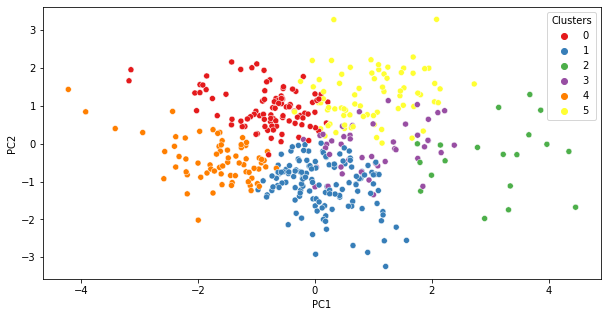

In [34]:
# Visualization of clusters division

plt.figure(figsize=(10,5))
sns.scatterplot(x='PC1', y='PC2', hue='Clusters', data=pca_df, palette='Set1')
plt.show()

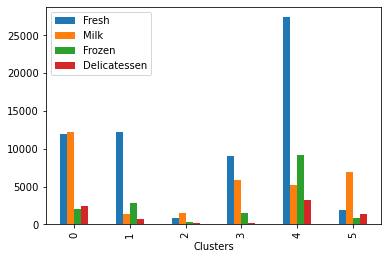

In [35]:
# Charts display clusters division in terms of purchasing products

original_data.groupby('Clusters').mean().plot(kind='bar')
plt.show()

Charts below show how mean of each feature was divided by clusters

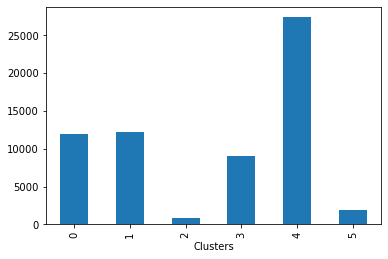

In [36]:
original_data.groupby('Clusters').Fresh.mean().plot(kind='bar')
plt.show()

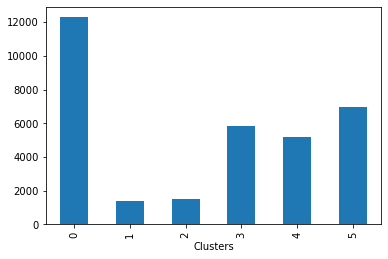

In [37]:
original_data.groupby('Clusters').Milk.mean().plot(kind='bar')
plt.show()

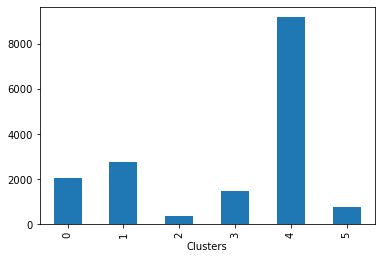

In [38]:
original_data.groupby('Clusters').Frozen.mean().plot(kind='bar')
plt.show()

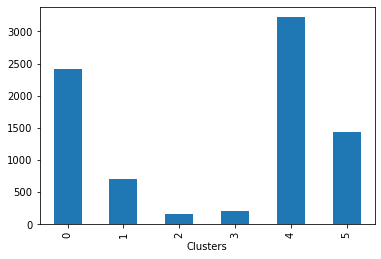

In [39]:
original_data.groupby('Clusters').Delicatessen.mean().plot(kind='bar')
plt.show()

Second algorithm I would like to test is hierarchical clustering

In [40]:
# First I compute distance matrix using pdist function, next I create symmetrical matrix using squareform function
# Finally I make data frame

dist = pd.DataFrame(squareform(pdist(scaled_data, metric='euclidean')))
dist.head()

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0.000000,1.760036,2.514829,3.353025,2.688978,0.949089,1.441331,1.883766,1.309024,1.522412,...,1.595300,3.365495,2.281045,2.365911,1.336587,3.386488,3.178815,0.782980,1.991635,3.541827
1,1.760036,0.000000,1.304252,2.273970,1.539163,0.842049,1.837706,0.715586,1.645779,0.401284,...,1.356873,1.725065,2.934133,1.445550,1.469006,1.968848,2.369454,1.317154,1.588841,4.354237
2,2.514829,1.304252,0.000000,2.455186,1.202653,1.800390,2.834066,1.144992,2.578732,1.291210,...,1.838375,2.038704,3.751760,1.979727,2.410118,2.127800,2.487307,2.014090,1.946635,5.403980
3,3.353025,2.273970,2.455186,0.000000,1.774560,2.575516,2.483910,1.789592,2.591488,2.567755,...,2.525549,1.590839,2.866099,2.082734,2.204830,2.326836,0.928318,3.215086,1.547406,4.868347
4,2.688978,1.539163,1.202653,1.774560,0.000000,1.951430,2.648424,1.243703,2.662472,1.745243,...,2.317304,1.635861,3.393944,2.349386,2.124935,1.441417,1.483998,2.217424,1.720769,5.443376


In [41]:
# Using complete linkage agglomeration algorithm which contains linkage matrix

clust = linkage(pdist(scaled_data, metric='euclidean'), method='complete')
clust

array([[3.20000000e+01, 4.32000000e+02, 1.21485504e-01, 2.00000000e+00],
       [1.50000000e+01, 1.33000000e+02, 1.21607994e-01, 2.00000000e+00],
       [1.14000000e+02, 1.20000000e+02, 1.47676664e-01, 2.00000000e+00],
       ...,
       [8.49000000e+02, 8.73000000e+02, 6.69446714e+00, 1.52000000e+02],
       [8.74000000e+02, 8.76000000e+02, 6.74034757e+00, 2.96000000e+02],
       [8.75000000e+02, 8.77000000e+02, 9.42309976e+00, 4.40000000e+02]])

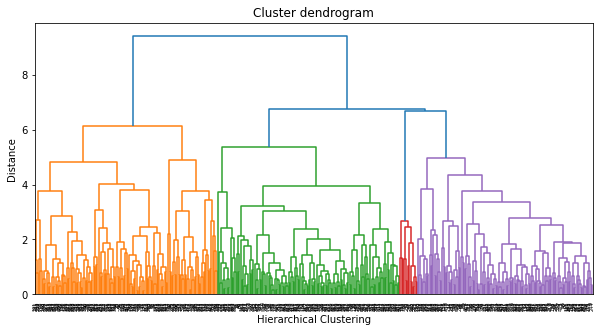

In [42]:
# We can visualize output using dendrogram

plt.figure(figsize=(10,5))
dendr = dendrogram(clust)
plt.xlabel('Hierarchical Clustering')
plt.ylabel('Distance')
plt.title('Cluster dendrogram')
plt.show()